L'objet de notre étude est **VGG-16**, une version du réseau de neurones convolutif très connu appelé **VGG-Net**. Nous allons d'abord l'implémenter de A à Z pour découvrir Keras, puis nous allons voir comment classifier des images de manière efficace. Pour cela, nous allons exploiter le réseau VGG-16 pré-entraîné fourni par Keras, et mettre en oeuvre le Transfer Learning. 

# Architecture de VGG-16

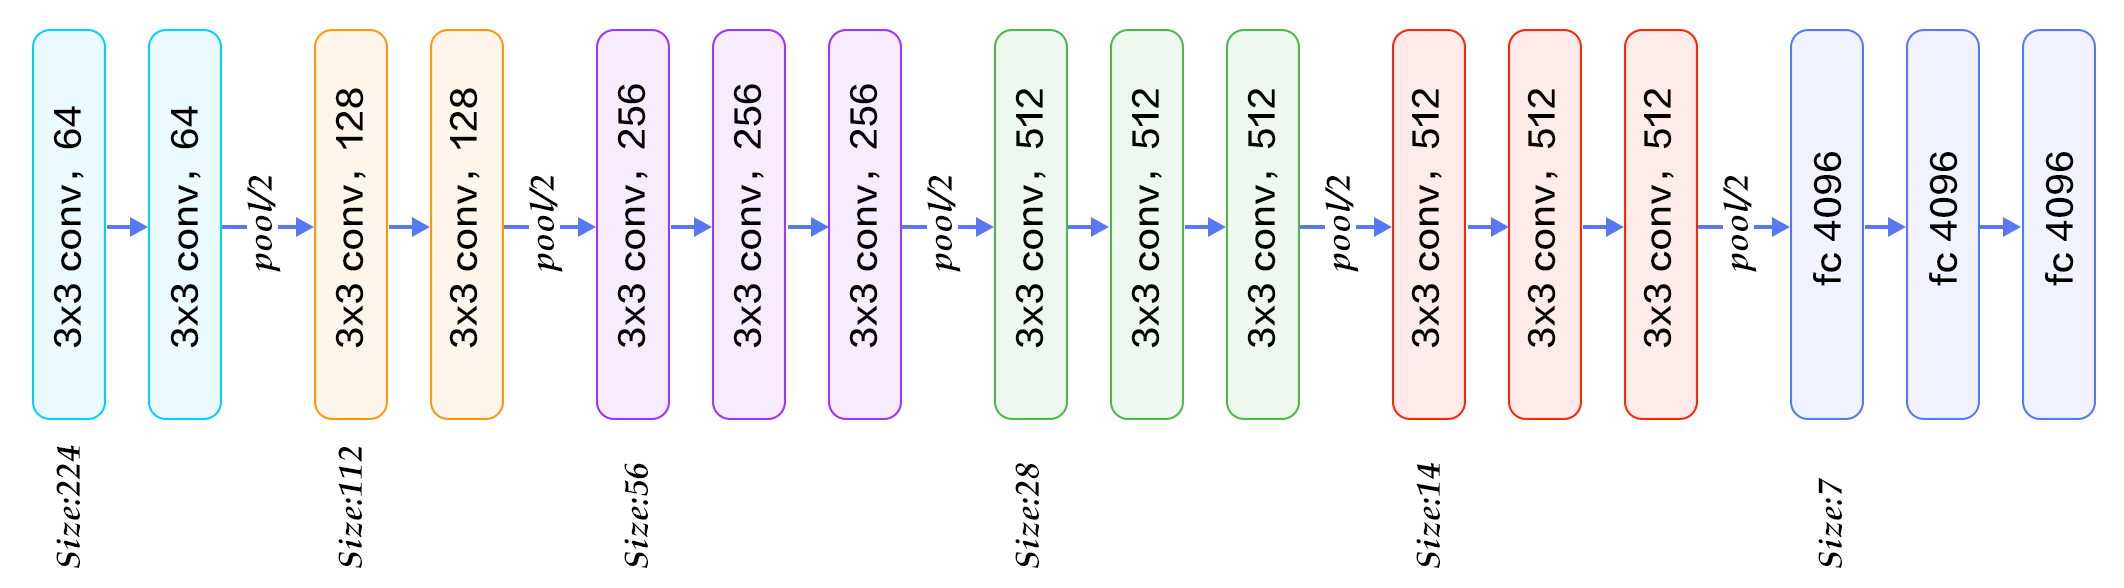

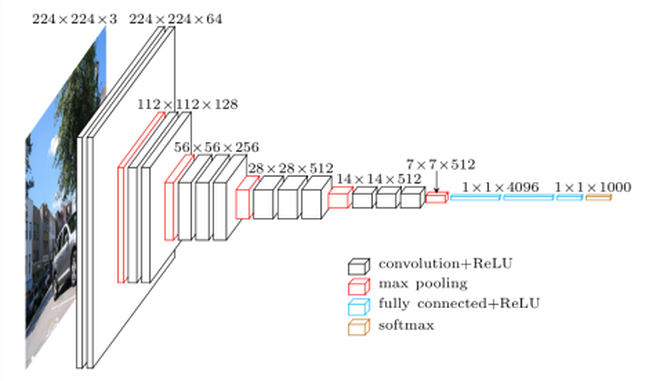

# Implémentation de VGG-16

In [4]:
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

In [5]:
my_VGG16 = Sequential()  # Création d'un réseau de neurones vide 

### Bloc 1
my_VGG16.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

### Bloc 2
my_VGG16.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

### Bloc 3
my_VGG16.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

### Bloc 4
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

### Bloc 5
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

### Bloc 6 (couches fully connected)
my_VGG16.add(Flatten())  # Conversion des matrices 3D en vecteur 1D
my_VGG16.add(Dense(4096, activation='relu'))
my_VGG16.add(Dense(4096, activation='relu'))
my_VGG16.add(Dense(1000, activation='softmax')) # Ajout de la dernière couche fully-connected qui permet de classifier

Instructions for updating:
Colocations handled automatically by placer.


# Utilisation du VGG-16 pré-entraîné

Dans cette partie, nous allons apprendre à classifier des images avec le modèle VGG-16 fourni par Keras et pré-entraîné sur ImageNet.

In [6]:
from keras.applications.vgg16 import VGG16

model = VGG16() # Création du modèle VGG-16 implementé par Keras

553467904/553467096 [==============================] - 24s 0us/step


In [7]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

img = load_img('simba.png', target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

In [9]:
y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

In [10]:
from keras.applications.vgg16 import decode_predictions

# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Top 3 : [('n03404251', 'fur_coat', 0.12521929), ('n04367480', 'swab', 0.06249311), ('n02490219', 'marmoset', 0.038646452)]


# Transfer Learning

In [12]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras.models import Model

# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau
x = model.output

# Ajouter la nouvelle couche fully-connected pour la classification à 10 classes
predictions = Dense(10, activation='softmax')(x)

# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

Stratégie 1 : fine-tuning total

In [14]:
# On entraîne tout le réseau, donc il faut rendre toutes les couches "entraînables"
for layer in model.layers:
    layer.trainable = True

Stratégie 2 : extraction de features

In [13]:
# On entraîne seulement le nouveau classifieur et on ne ré-entraîne pas les autres couches
for layer in model.layers:
    layer.trainable = False

Stratégie 3 : fine-tuning partiel

In [ ]:
# On entraîne le nouveau classifieur et les couches hautes
# Ne pas entraîner les 5 premières couches (les plus basses) 
for layer in model.layers[:5]:
    layer.trainable = False

Entraînement du réseau

In [ ]:
# Compiler le modèle 
new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

# Entraîner sur les données d'entraînement (X_train, y_train)
model_info = new_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)